In [1]:
%pip install seaborn

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import math
from scipy.stats import stats
import random

In [3]:

credit = pd.read_csv('credit.csv')
bool_map = {'Yes': 1, 'No': 0}
credit["Married"] = credit["Married"].replace(bool_map)
credit["Student"] = credit["Student"].replace(bool_map)
credit["Own"] = credit["Own"].replace(bool_map)

region_map = {'South': 1, 'West': 2, 'East': 3}
credit["Region"] = credit["Region"].replace(region_map)

print('Summary:')
print(credit.describe())
print('First 10 rows:')
print(credit.head(10))
print('Correlation matrix:')
print(credit.corr())
credit.info()

Summary:
           Income         Limit      Rating       Cards         Age  \
count  400.000000    400.000000  400.000000  400.000000  400.000000   
mean    45.218885   4735.600000  354.940000    2.957500   55.667500   
std     35.244273   2308.198848  154.724143    1.371275   17.249807   
min     10.354000    855.000000   93.000000    1.000000   23.000000   
25%     21.007250   3088.000000  247.250000    2.000000   41.750000   
50%     33.115500   4622.500000  344.000000    3.000000   56.000000   
75%     57.470750   5872.750000  437.250000    4.000000   70.000000   
max    186.634000  13913.000000  982.000000    9.000000   98.000000   

        Education         Own     Student    Married     Region      Balance  
count  400.000000  400.000000  400.000000  400.00000  400.00000   400.000000  
mean    13.450000    0.517500    0.100000    0.61250    1.75000   520.015000  
std      3.125207    0.500319    0.300376    0.48779    0.82717   459.758877  
min      5.000000    0.000000    0.

In [201]:
credit.Age.value_counts().sort_index()

23    1
24    3
25    7
26    1
27    2
     ..
86    1
87    2
89    1
91    1
98    1
Name: Age, Length: 68, dtype: int64

In [5]:
credit_array = credit.to_numpy()
print(credit_array)

[[1.48910e+01 3.60600e+03 2.83000e+02 ... 1.00000e+00 1.00000e+00
  3.33000e+02]
 [1.06025e+02 6.64500e+03 4.83000e+02 ... 1.00000e+00 2.00000e+00
  9.03000e+02]
 [1.04593e+02 7.07500e+03 5.14000e+02 ... 0.00000e+00 2.00000e+00
  5.80000e+02]
 ...
 [5.78720e+01 4.17100e+03 3.21000e+02 ... 1.00000e+00 1.00000e+00
  1.38000e+02]
 [3.77280e+01 2.52500e+03 1.92000e+02 ... 1.00000e+00 1.00000e+00
  0.00000e+00]
 [1.87010e+01 5.52400e+03 4.15000e+02 ... 0.00000e+00 2.00000e+00
  9.66000e+02]]


In [211]:
conditions3 = [
    (credit["Age"] <= 30),
    (credit["Age"]<=40),
    (credit["Age"]<=50),
    (credit["Age"]<=60),
    (credit["Age"]<=70),
    (credit["Age"]> 70)
            ]
values3 = ['to30', 'to40', 'to50', 'to60', 'to70', 'from70']
values3_b = [ '1', '2', '3', '4', '5', '6']
credit['Age_ranges_des'] = np.select(conditions3, values3)
credit['Age_ranges'] = np.select(conditions3, values3_b).astype('int64')

In [207]:
conditions2 = [
    (credit["Education"] <= 4),
    (credit["Education"]<=11),
    (credit["Education"]<=15),
    (credit["Education"]<=17),
    (credit["Education"]<=18),
    (credit["Education"]> 18)
            ]
values2 = ['No_edu', 'Primary', 'High', 'Bacheior', 'Master', 'PhD']
values2_b = [ '1', '2', '3', '4', '5', '6']
credit['Education_ranges_des'] = np.select(conditions2, values2)
credit['Education_ranges'] = np.select(conditions2, values2_b).astype('int64')

In [212]:
conditions = [
    (credit["Limit"] <= 1500),
    (credit["Limit"]<=3000),
    (credit["Limit"]<=4500),
    (credit["Limit"]<=6000),
    (credit["Limit"]<=9000),
    (credit["Limit"]> 9000)
            ]
values = ['0-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7000', '>7000']
values_b = [ '1', '2', '3', '4', '5', '6']
credit['Limit_groups_des'] = np.select(conditions, values)
credit['Limit_groups'] =np.select(conditions, values_b).astype('int64')
print(credit.head(10))

    Income  Limit  Rating  Cards  Age  Education  Own  Student  Married  \
0   14.891   3606     283      2   34         11    0        0        1   
1  106.025   6645     483      3   82         15    1        1        1   
2  104.593   7075     514      4   71         11    0        0        0   
3  148.924   9504     681      3   36         11    1        0        0   
4   55.882   4897     357      2   68         16    0        0        1   
5   80.180   8047     569      4   77         10    0        0        0   
6   20.996   3388     259      2   37         12    1        0        0   
7   71.408   7114     512      2   87          9    0        0        0   
8   15.125   3300     266      5   66         13    1        0        0   
9   71.061   6819     491      3   41         19    1        1        1   

   Region  Balance  Education_ranges Limit_groups_des  Limit_groups  \
0       1      333                 2        3000-4000             3   
1       2      903              

In [209]:
credit.Limit_groups.value_counts().sort_index()

1     22
2     75
3     96
4    110
5     75
6     22
Name: Limit_groups, dtype: int64

In [210]:
credit.Age_ranges.value_counts().sort_index()

1    32
2    59
3    82
4    61
5    72
6    94
Name: Age_ranges, dtype: int64

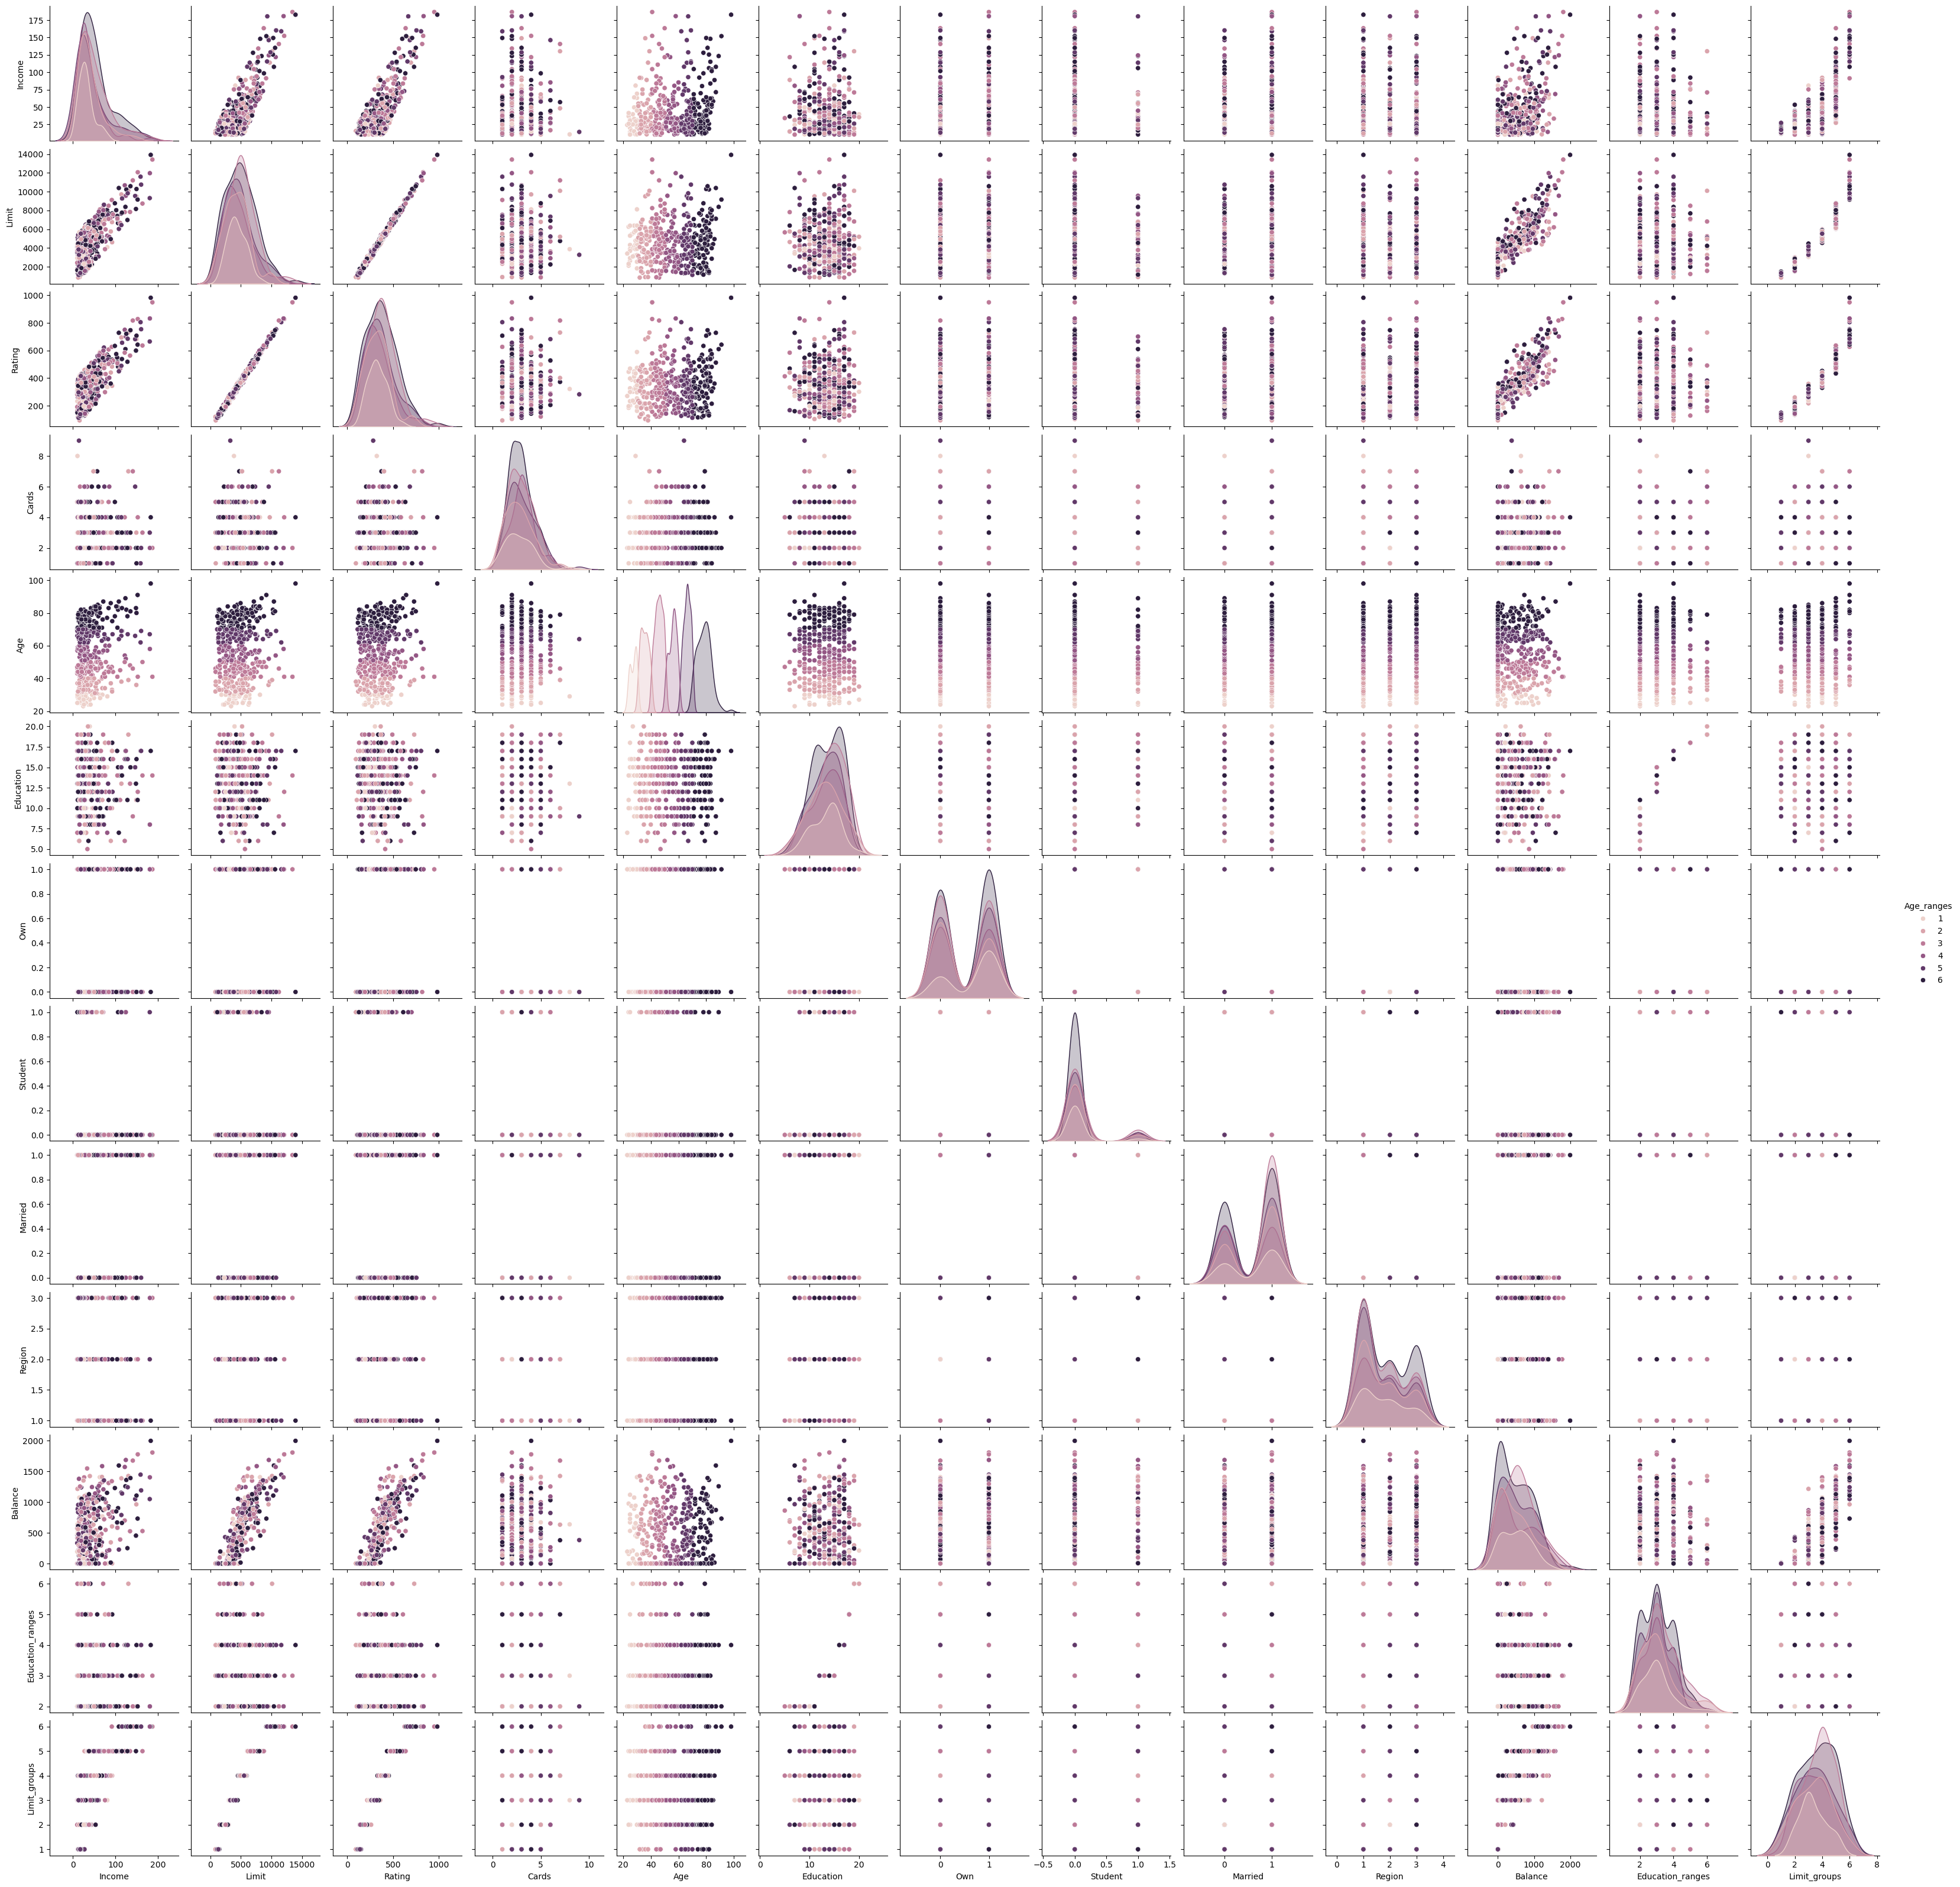

In [213]:
sns.pairplot(credit, hue='Age_ranges')

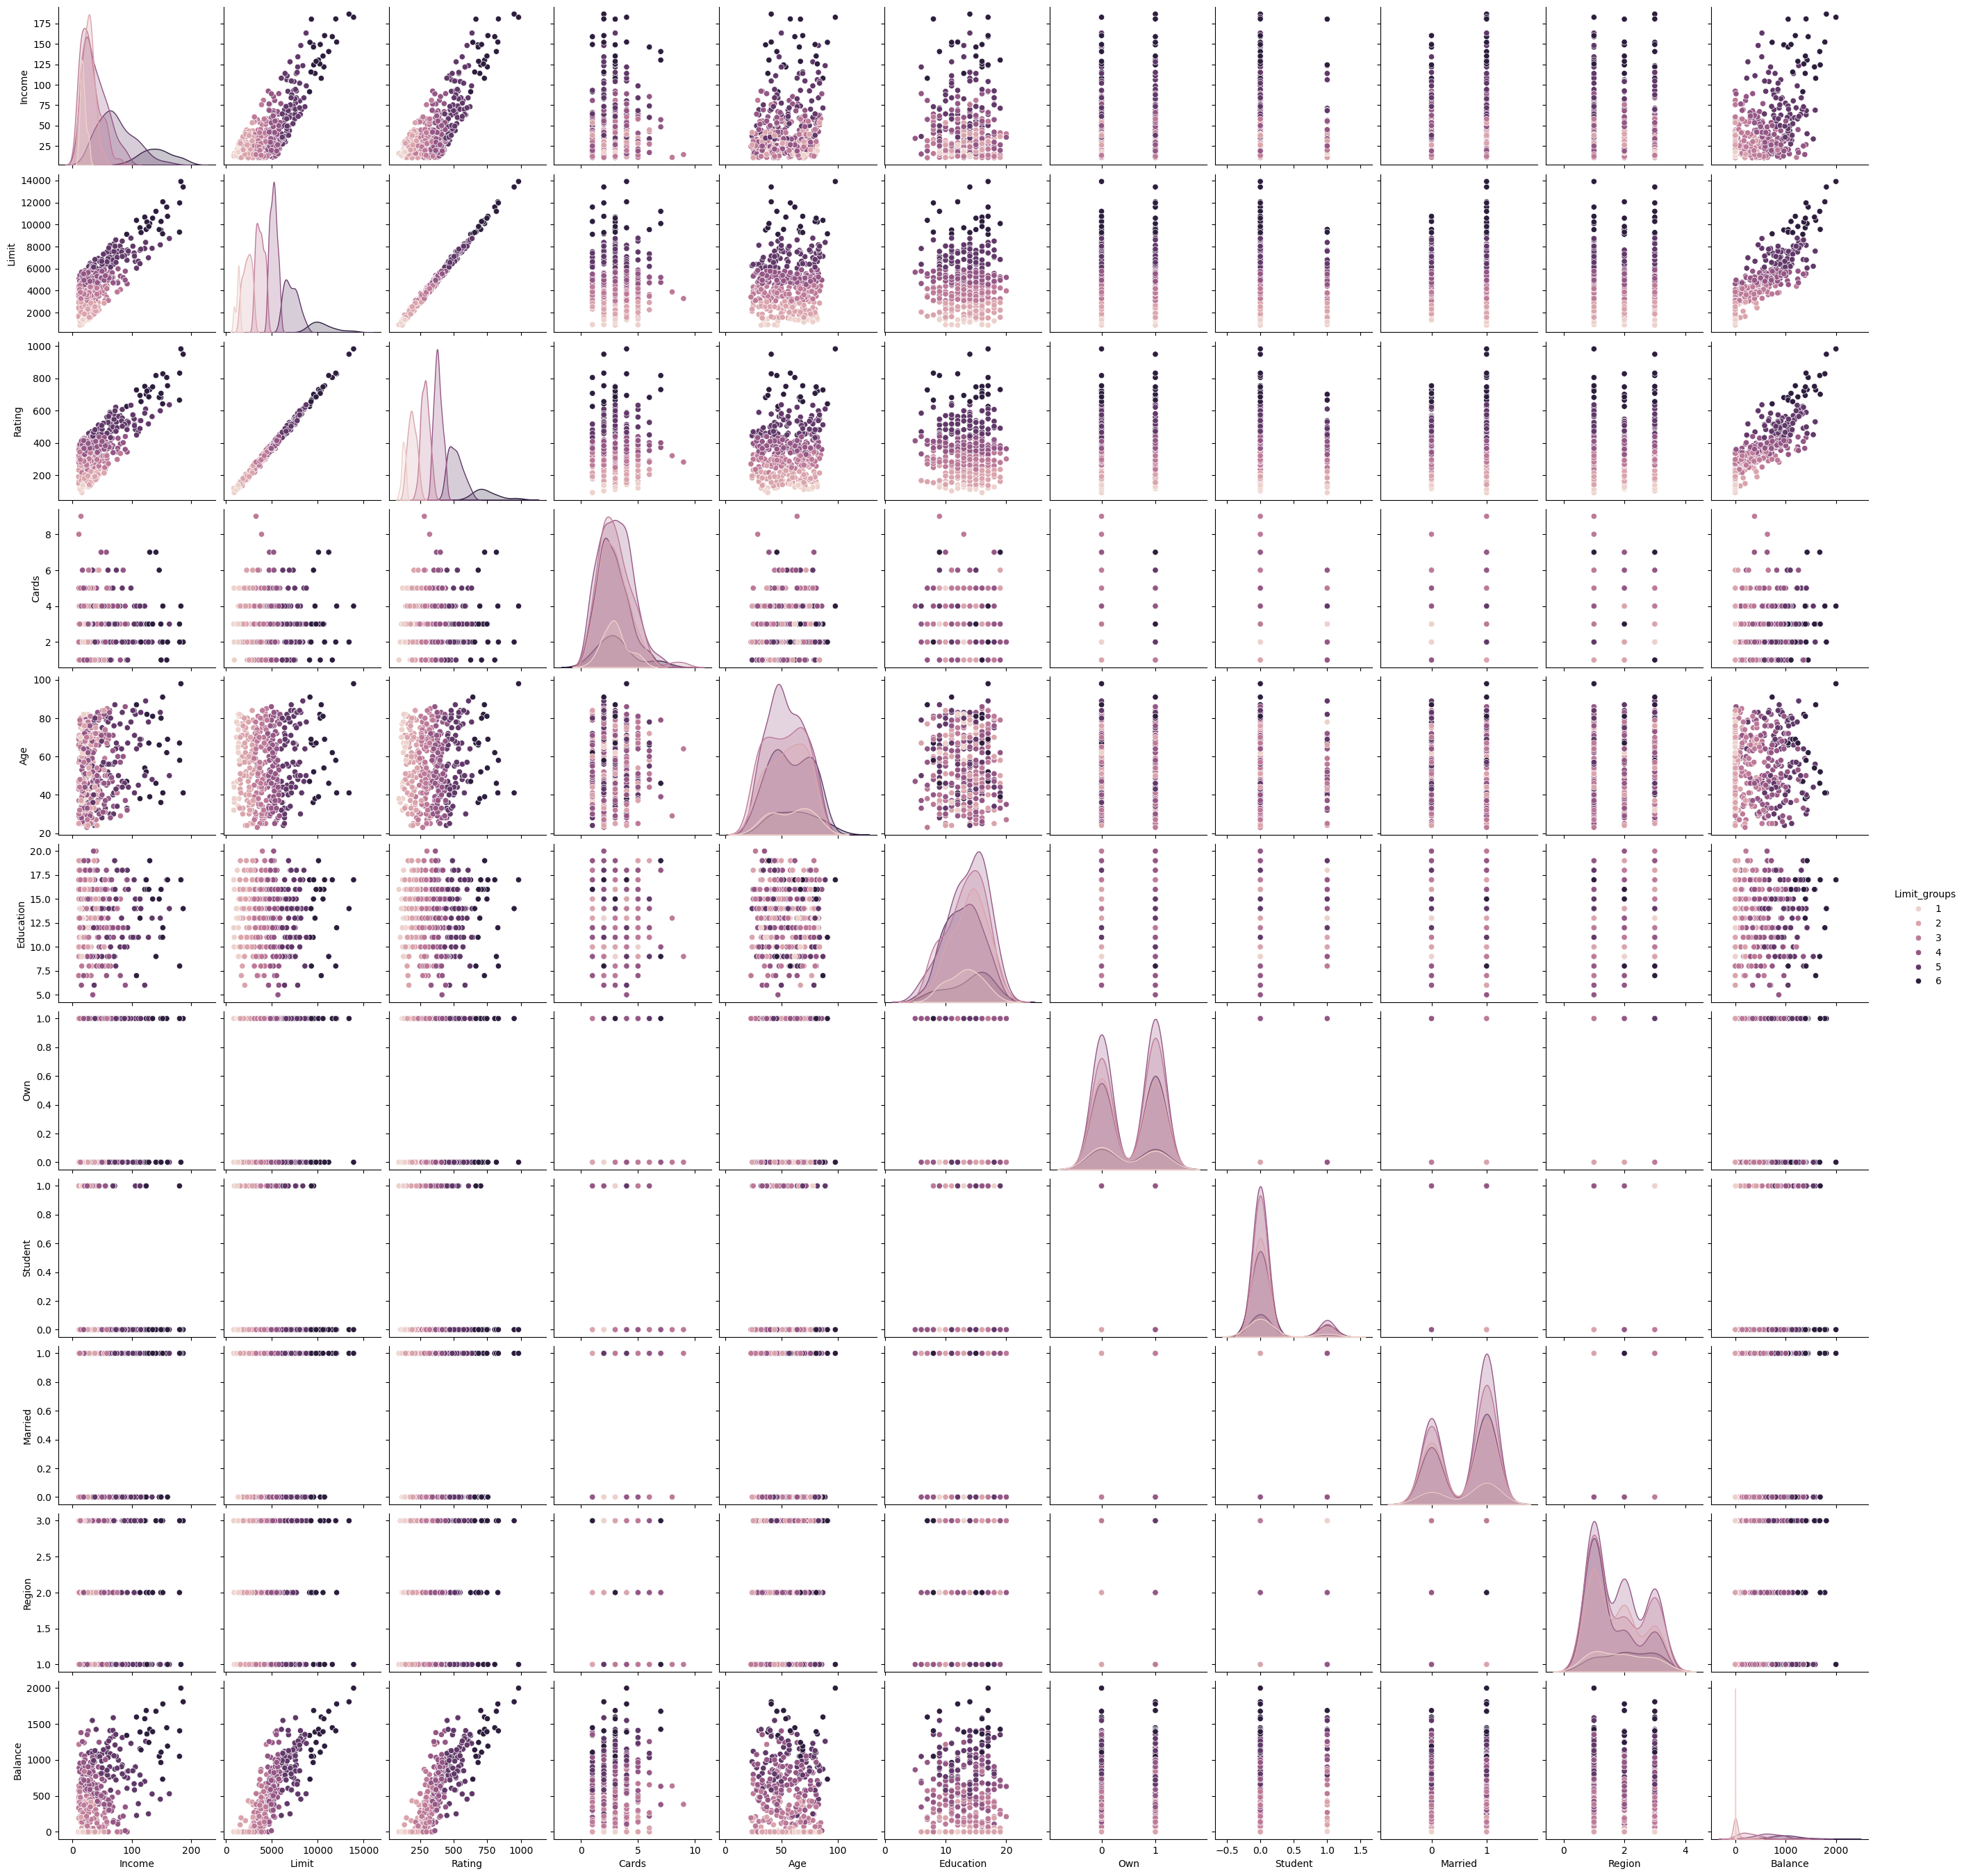

In [192]:
sns.pairplot(credit, hue='Limit_groups')

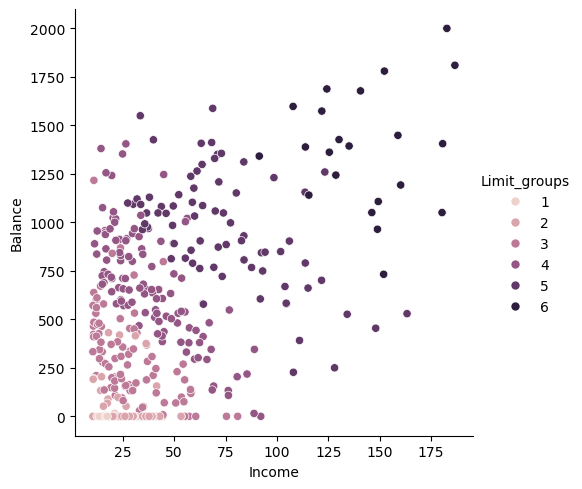

In [198]:
sns.relplot(credit, x='Income', y='Balance', hue='Limit_groups')

In [214]:
credit.corr()

<ipython-input-214-6bad545f68c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit.corr()


Income     Limit    Rating     Cards       Age  Education  \
Income            1.000000  0.792088  0.791378 -0.018273  0.175338  -0.027692   
Limit             0.792088  1.000000  0.996880  0.010231  0.100888  -0.023549   
Rating            0.791378  0.996880  1.000000  0.053239  0.103165  -0.030136   
Cards            -0.018273  0.010231  0.053239  1.000000  0.042948  -0.051084   
Age               0.175338  0.100888  0.103165  0.042948  1.000000   0.003619   
Education        -0.027692 -0.023549 -0.030136 -0.051084  0.003619   1.000000   
Own              -0.010738  0.009397  0.008885 -0.022658  0.004015  -0.005049   
Student           0.019632 -0.006015 -0.002028 -0.026164 -0.029844   0.072085   
Married           0.035652  0.031155  0.036751 -0.009695 -0.073136   0.048911   
Region            0.032888  0.020837  0.020288  0.003867  0.032451   0.030055   
Balance           0.463656  0.861697  0.863625  0.086456  0.001835  -0.008062   
Education_ranges -0.035996 -0.009559 -0.012798 -0.012513 -0.024040   0.902937   
Limit_groups      0.690266  0.947838  0.943468  0.002547  0.061932  -0.033044   
Age_ranges        0.137067  0.068583  0.071008  0.048958  0.979033   0.008994   

                       Own   Student   Married    Region   Balance  \
Income           -0.010738  0.019632  0.035652  0.032888  0.463656   
Limit             0.009397 -0.006015  0.031155  0.020837  0.861697   
Rating            0.008885 -0.002028  0.036751  0.020288  0.863625   
Cards            -0.022658 -0.026164 -0.009695  0.003867  0.086456   
Age               0.004015 -0.029844 -0.073136  0.032451  0.001835   
Education        -0.005049  0.072085  0.048911  0.030055 -0.008062   
Own               1.000000  0.055034  0.012452 -0.001514  0.021474   
Student           0.055034  1.000000 -0.076974  0.030261  0.259018   
Married           0.012452 -0.076974  1.000000 -0.060563 -0.005673   
Region           -0.001514  0.030261 -0.060563  1.000000  0.009157   
Balance           0.021474  0.259018 -0.005673  0.009157  1.000000   
Education_ranges  0.000281  0.064748  0.067807  0.038672  0.013515   
Limit_groups      0.018942  0.008409  0.024746 -0.012332  0.839860   
Age_ranges        0.001945 -0.027765 -0.066331  0.033608 -0.016629   

                  Education_ranges  Limit_groups  Age_ranges  
Income                   -0.035996      0.690266    0.137067  
Limit                    -0.009559      0.947838    0.068583  
Rating                   -0.012798      0.943468    0.071008  
Cards                    -0.012513      0.002547    0.048958  
Age                      -0.024040      0.061932    0.979033  
Education                 0.902937     -0.033044    0.008994  
Own                       0.000281      0.018942    0.001945  
Student                   0.064748      0.008409   -0.027765  
Married                   0.067807      0.024746   -0.066331  
Region                    0.038672     -0.012332    0.033608  
Balance                   0.013515      0.839860   -0.016629  
Education_ranges          1.000000     -0.015762   -0.022298  
Limit_groups             -0.015762      1.000000    0.040265  
Age_ranges               -0.022298      0.040265    1.000000

<ipython-input-215-84ec24483fcb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit.corr(), annot = True, fmt=".2f")


<AxesSubplot:>

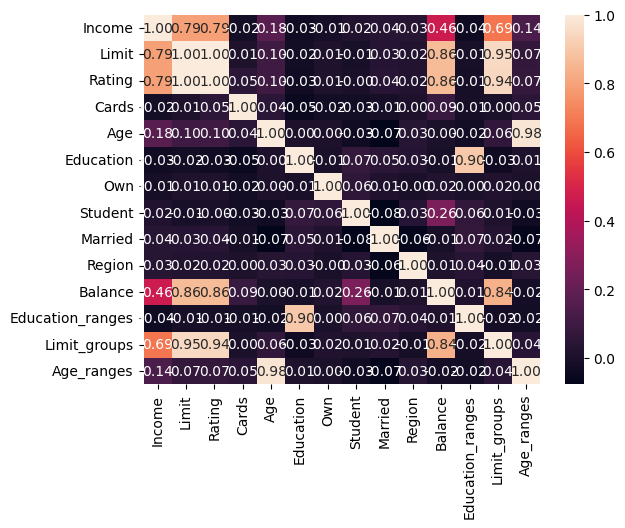

In [215]:
sns.heatmap(credit.corr(), annot = True, fmt=".2f")

In [222]:


X = credit[['Income', 'Student', 'Balance']]
y = credit['Limit_groups']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify = y)

In [223]:
print(X)
print(y)

      Income  Student  Balance
0     14.891        0      333
1    106.025        1      903
2    104.593        0      580
3    148.924        0      964
4     55.882        0      331
..       ...      ...      ...
395   12.096        0      560
396   13.364        0      480
397   57.872        0      138
398   37.728        0        0
399   18.701        0      966

[400 rows x 3 columns]
0      3
1      5
2      5
3      6
4      4
      ..
395    3
396    3
397    3
398    2
399    4
Name: Limit_groups, Length: 400, dtype: int64


In [224]:
model = LogisticRegression(C=100.0, solver='lbfgs', max_iter=100, multi_class='ovr')
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.72

In [225]:
X_train

Income  Student  Balance
340   27.794        0      320
41   113.659        1     1155
83    19.225        0        0
70    24.889        0      357
46    19.531        1     1241
..       ...      ...      ...
326  125.480        0     1361
370   35.610        0      992
183   80.861        0        0
161   31.353        0        0
184  158.889        0     1448

[300 rows x 3 columns]

In [226]:

scores = cross_val_score(model, X, y, cv=15)

scores

array([0.81481481, 0.55555556, 0.74074074, 0.66666667, 0.66666667,
       0.62962963, 0.74074074, 0.7037037 , 0.81481481, 0.7037037 ,
       0.69230769, 0.65384615, 0.76923077, 0.61538462, 0.76923077])

In [227]:
print(np.mean(scores))

0.7024691358024692


In [228]:
predictions = model.predict(X_test) 

compare = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare = compare.reset_index(drop = True)
compare

actual  predicted
0        5          5
1        5          5
2        4          4
3        4          4
4        4          4
..     ...        ...
95       2          2
96       3          2
97       3          4
98       6          6
99       6          6

[100 rows x 2 columns]

In [229]:
y.name

'Limit_groups'

In [230]:

from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, predictions)

# Wyświetlmy macierz błędów
print("Macierz błędów:\n")
print(cf)

# stworzenie ramki danych z macierzy błędów, wraz z opisem kolumn (columns) i wierszy (index)
pd.DataFrame(
    cf,
    index=values, 
    columns=values)

Macierz błędów:

[[ 0  5  0  0  0  0]
 [ 0 17  2  0  0  0]
 [ 0  5 14  5  0  0]
 [ 0  2  2 24  0  0]
 [ 0  0  0  6 13  0]
 [ 0  0  0  0  1  4]]


0-2000  2000-3000  3000-4000  4000-5000  5000-7000  >7000
0-2000          0          5          0          0          0      0
2000-3000       0         17          2          0          0      0
3000-4000       0          5         14          5          0      0
4000-5000       0          2          2         24          0      0
5000-7000       0          0          0          6         13      0
>7000           0          0          0          0          1      4

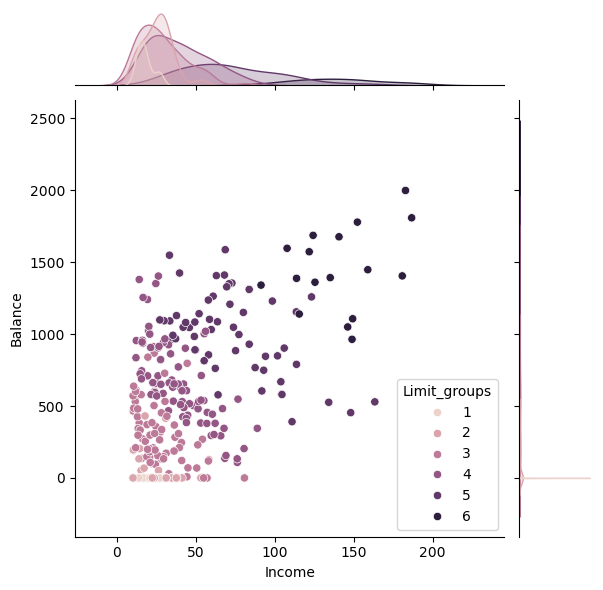

In [231]:

sns.jointplot(data=X_train, x="Income", y="Balance", hue=y_train)

In [232]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, predictions, target_names = values)

print(cr)

/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      0-2000       0.00      0.00      0.00         5
   2000-3000       0.59      0.89      0.71        19
   3000-4000       0.78      0.58      0.67        24
   4000-5000       0.69      0.86      0.76        28
   5000-7000       0.93      0.68      0.79        19
       >7000       1.00      0.80      0.89         5

    accuracy                           0.72       100
   macro avg       0.66      0.64      0.64       100
weighted avg       0.72      0.72      0.70       100



In [233]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Limit_groups   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     550.4
Date:                Thu, 20 Jun 2024   Prob (F-statistic):          1.05e-120
Time:                        23:14:00   Log-Likelihood:                -220.61
No. Observations:                 300   AIC:                             449.2
Df Residuals:                     296   BIC:                             464.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9866      0.050     39.390      0.0

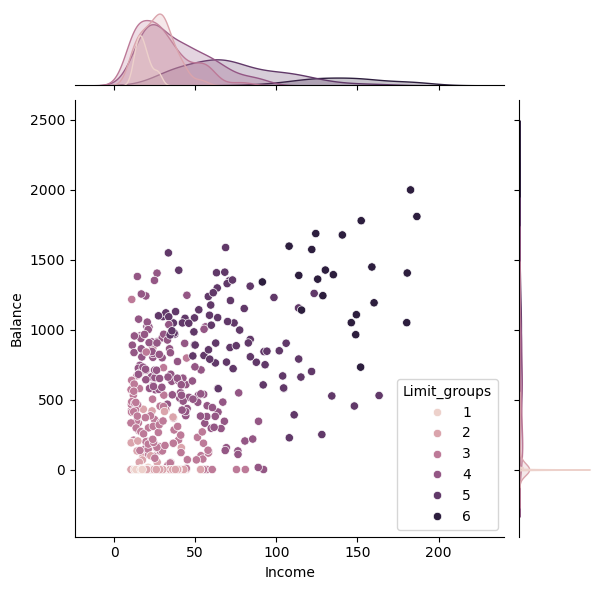

In [236]:
sns.jointplot(data=credit, x="Income", y="Balance", hue='Limit_groups')

In [242]:
X_train_2 = credit["Income"].values
y_train_2 = credit["Balance"].values
X_train_2

array([ 14.891, 106.025, 104.593, 148.924,  55.882,  80.18 ,  20.996,
        71.408,  15.125,  71.061,  63.095,  15.045,  80.616,  43.682,
        19.144,  20.089,  53.598,  36.496,  49.57 ,  42.079,  17.7  ,
        37.348,  20.103,  64.027,  10.742,  14.09 ,  42.471,  32.793,
       186.634,  26.813,  34.142,  28.941, 134.181,  31.367,  20.15 ,
        23.35 ,  62.413,  30.007,  11.795,  13.647,  34.95 , 113.659,
        44.158,  36.929,  31.861,  77.38 ,  19.531,  44.646,  44.522,
        43.479,  36.362,  39.705,  44.205,  16.304,  15.333,  32.916,
        57.1  ,  76.273,  10.354,  51.872,  35.51 ,  21.238,  30.682,
        14.132,  32.164,  12.   , 113.829,  11.187,  27.847,  49.502,
        24.889,  58.781,  22.939,  23.989,  16.103,  33.017,  30.622,
        20.936, 110.968,  15.354,  27.369,  53.48 ,  23.672,  19.225,
        43.54 , 152.298,  55.367,  11.741,  15.56 ,  59.53 ,  20.191,
        48.498,  30.733,  16.479,  38.009,  14.084,  14.312,  26.067,
        36.295,  83.

In [239]:
print(X_train_2.shape) # rozmiar wektora
print(X_train_2.reshape(-1, 1).shape) # rozmiar macierzy

(400,)
(400, 1)


In [240]:
r_squared = model.score(X_train_2.reshape(-1, 1), y_train_2 )
print("R2:", r_squared)

<class 'ValueError'>: shapes (4,4) and (400,1) not aligned: 4 (dim 1) != 400 (dim 0)